In [2]:
pip install pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score


In [4]:
# 1. Cargar datos
df = pd.read_csv('winequality.csv')
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

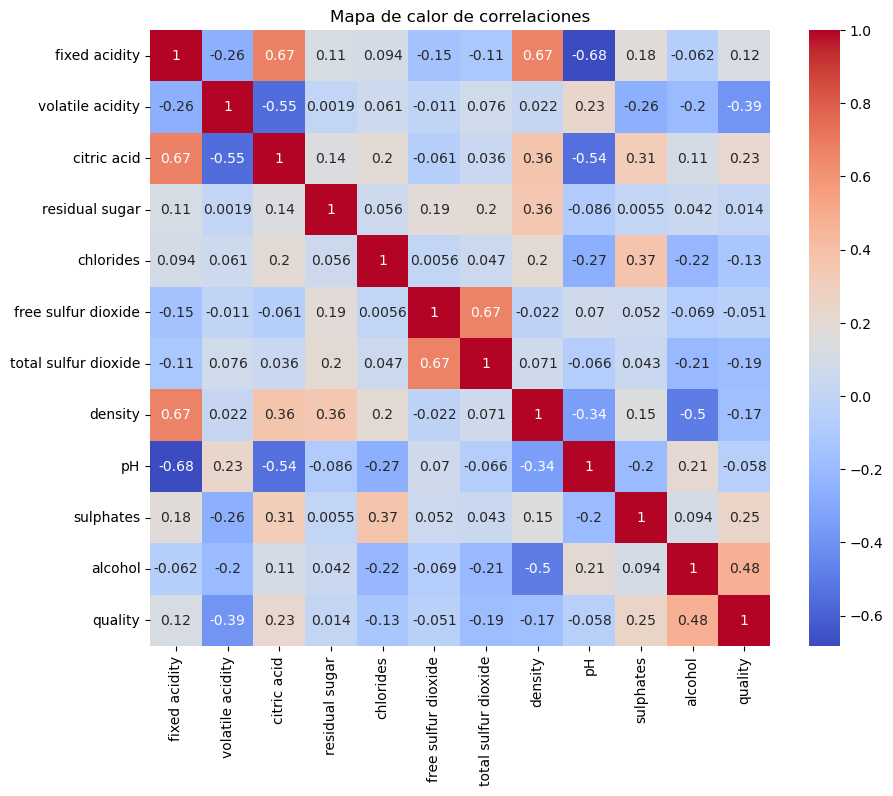

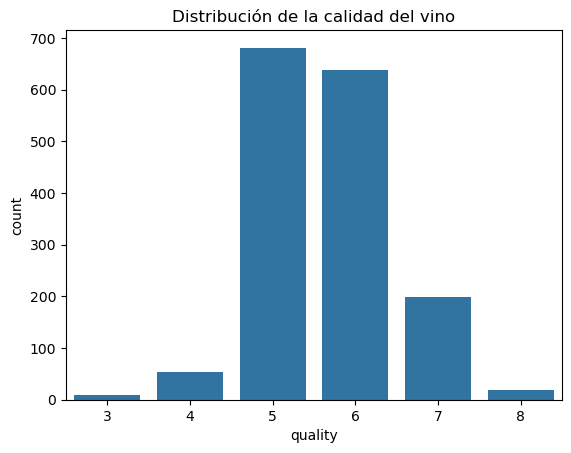

In [5]:
# 2. Análisis exploratorio
print(df.describe())
print(df.info())

# Correlaciones
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()

# Distribución de la variable objetivo
sns.countplot(x='quality', data=df)
plt.title('Distribución de la calidad del vino')
plt.show()

In [6]:
# 3. Preprocesamiento
# No hay valores nulos, se normalizarán variables
X = df.drop('quality', axis=1)
y = df['quality']

# Clasificación binaria para Regresión Logística y Árbol
# 0 = mala calidad (<=5), 1 = buena calidad (>=6)
y_binaria = (y >= 6).astype(int)

# Escalamiento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# 4. División Train/Test
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
_, _, y_train_cls, y_test_cls = train_test_split(X_scaled, y_binaria, test_size=0.2, random_state=42)

In [8]:
# 5. Modelos

# Árbol de Decisión
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train_cls)
y_pred_tree = tree.predict(X_test)

print("\n[Árbol de Decisión]")
print(confusion_matrix(y_test_cls, y_pred_tree))
print(classification_report(y_test_cls, y_pred_tree))


[Árbol de Decisión]
[[110  31]
 [ 56 123]]
              precision    recall  f1-score   support

           0       0.66      0.78      0.72       141
           1       0.80      0.69      0.74       179

    accuracy                           0.73       320
   macro avg       0.73      0.73      0.73       320
weighted avg       0.74      0.73      0.73       320



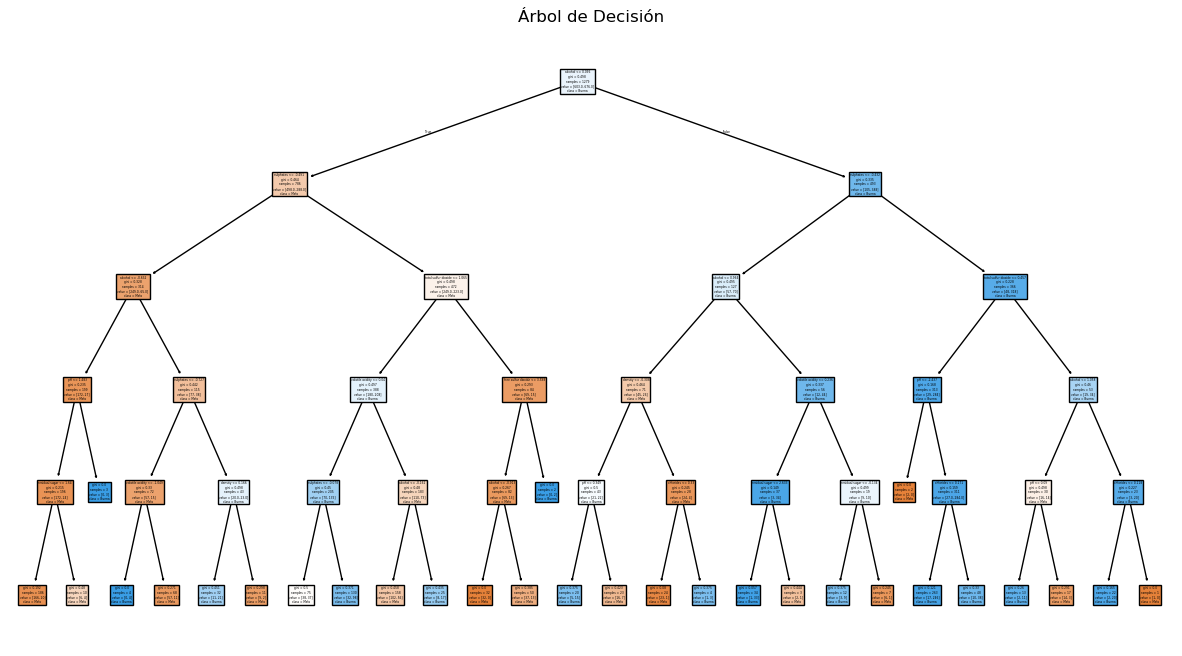

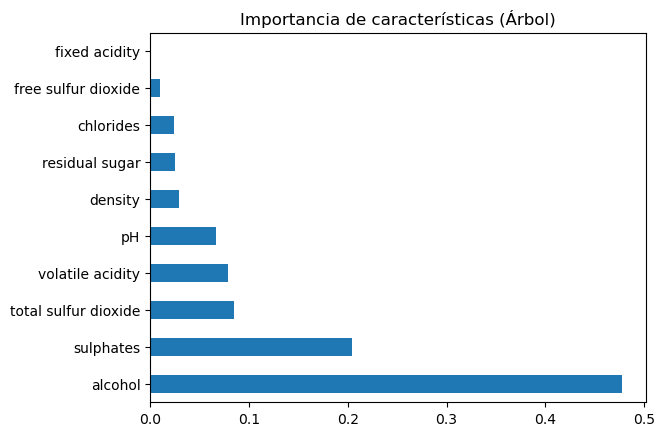

In [9]:
# 6. Visualizaciones de resultados

# Árbol de decisión
plt.figure(figsize=(15, 8))
plot_tree(tree, feature_names=df.columns[:-1], class_names=["Mala", "Buena"], filled=True)
plt.title('Árbol de Decisión')
plt.show()

# 7. Importancia de variables
importancias = pd.Series(tree.feature_importances_, index=df.columns[:-1])
importancias.nlargest(10).plot(kind='barh')
plt.title('Importancia de características (Árbol)')
plt.show()